All the Lifecycle In A Data Science Projects

Data Analysis

Feature Engineering

Feature Selection

Model Building

Model Deployment

#PROBLEM STATEMENT

Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

Importing Libraries

In [148]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
import seaborn as sns

In [149]:
df1 = pd.read_csv('/content/train-chennai-sale.csv')
df1.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


#CHECKING FOR DUPLICATES

In [150]:
df1.duplicated().sum()

0

we dont have any duplicate

#CHECKING NULL VALUES

In [151]:
df1['N_BEDROOM'].mode()[0]

1.0

In [152]:
df1.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

we have null values and we can fill or drop , but dropping could lead to loss of information , we need to fill now....

In [153]:
df1['N_BEDROOM'] = df1['N_BEDROOM'].fillna(df1['N_BEDROOM'].mode()[0])

In [154]:
df1['N_BATHROOM']=df1['N_BEDROOM'].fillna(df1['N_BEDROOM'].mode()[0])

In [155]:
df1[['QS_OVERALL']].isnull().sum()

QS_OVERALL    48
dtype: int64

In [156]:
df1['QS_OVERALL']=df1['QS_OVERALL'].fillna(df1['QS_OVERALL'].mean())

Checking Null values

In [157]:
df1.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

Checking Outliers

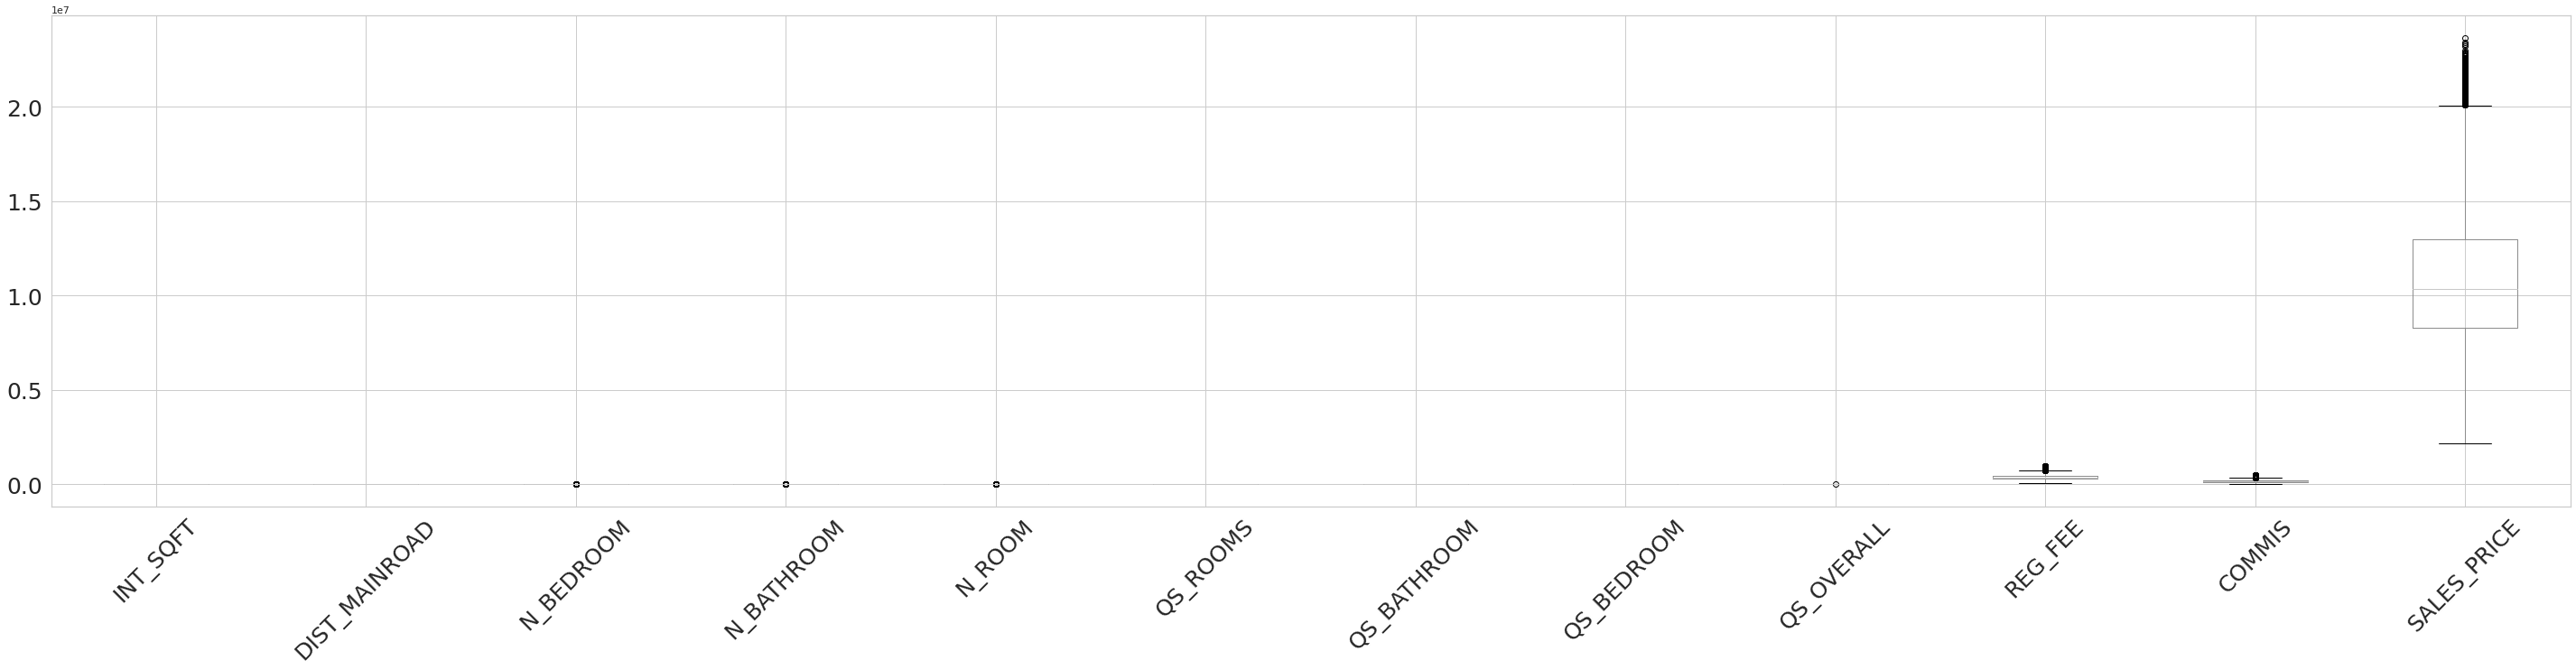

In [158]:
df1.boxplot(figsize=(50,10),fontsize=25,rot=45)

As Reg_fee , commis not required for this project , we will check about Sales Price

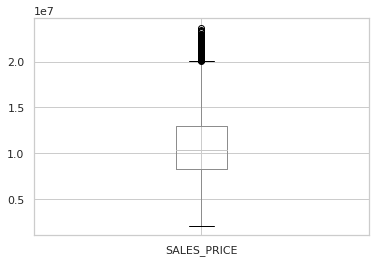

In [159]:
df1.boxplot(column=['SALES_PRICE'])

In [160]:
q1=df1['SALES_PRICE'].quantile(0.25)
q3=df1['SALES_PRICE'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)

8272100.0 12993900.0 4721800.0


Checking Datatypes

In [161]:
df1.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [162]:
df1['DATE_BUILD']=pd.to_datetime(df1['DATE_BUILD'])
df1['DATE_SALE']=pd.to_datetime(df1['DATE_SALE'])

CREATING AGE COLUMN 

In [163]:
df1['Age']=pd.DatetimeIndex(df1['DATE_SALE']).year-pd.DatetimeIndex(df1['DATE_BUILD']).year
df1['Age']

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: Age, Length: 7109, dtype: int64

In [164]:
df1.dtypes

PRT_ID                   object
AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM               float64
N_BATHROOM              float64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
Age                       int64
dtype: object

SPELLING CORRECTION FOR CATEGORICAL FEATURES

In [165]:
#we will see what kind of details we have

df1['DIST_MAINROAD'].count()

7109

In [166]:
df1['N_BEDROOM'].unique()

array([1., 2., 3., 4.])

In [167]:
df1['N_BATHROOM'].unique()

array([1., 2., 3., 4.])

In [168]:
df1['N_ROOM'].unique()

array([3, 5, 4, 2, 6])

In [169]:
df1['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [170]:
df1['SALE_COND'].replace({'Ab Normal':'Abnormal'},inplace=True)

In [171]:
df1['SALE_COND'].replace({'AbNormal':'Abnormal'},inplace=True)

In [172]:
df1['SALE_COND'].replace({'PartiaLl':'Partial','Adj Land':'AdjLand','Partiall':'Partial'},inplace=True)

In [173]:
df1['SALE_COND'].unique() #corrected sale_cond

array(['Abnormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [217]:
df1['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'No Sewer', 'NoSeWa', 'All Pub'], dtype=object)

In [220]:
df1['UTILITY_AVAIL'].replace({'NoSeWa':'No Sewer'},inplace=True)

In [218]:
df1['UTILITY_AVAIL'].replace({'No Sewer ':'No Sewer'},inplace=True)

In [223]:
df1['UTILITY_AVAIL'].replace({'All Pub':'AllPub'},inplace=True)

In [221]:
df1['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'No Sewer', 'All Pub'], dtype=object)

In [178]:
df1['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [179]:
df1['STREET'].replace({'Pavd':'Paved'},inplace=True)

In [180]:
df1['STREET'].replace({'NoAccess':'No Access'},inplace=True)

In [181]:
df1['STREET'].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [182]:
df1['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [183]:
df1['SALES_PRICE'].sort_values(ascending=False)

837     23667340
6336    23407860
6164    23314580
125     23307000
4779    23247590
          ...   
1488     2939750
2986     2797250
2369     2640250
1336     2476375
3385     2156875
Name: SALES_PRICE, Length: 7109, dtype: int64

In [184]:
df1['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [185]:
df1['BUILDTYPE'].replace({'Other':'Others','Comercial':'Commercial'},inplace=True)

In [186]:
df1['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [187]:
df1['AREA'].unique() #spelling mistakes we can find 

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [188]:
df1['AREA'].replace({'T Nagar':'TNagar','Chrmpet':'Chrompet','Chrompt':'Chrompet','Karapakam':'Karapakkam','Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar','Adyr':'Adayar','Velchery':'Velachery'},inplace=True)

In [189]:
df1['AREA'].replace({'Chormpet':'Chrompet'},inplace=True)

In [190]:
df1['AREA'].replace({'KKNagar':'KK Nagar'},inplace=True)

In [191]:
df1['AREA'].replace({'Adayar':'Adyar'},inplace=True)

In [192]:
df1['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar'], dtype=object)

In [193]:
df1.shape

(7109, 23)

In [194]:
df1.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'Age'],
      dtype='object')

In [195]:
df1['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [196]:
df1['PARK_FACIL'].replace({'Noo':'No'},inplace=True)

In [197]:
df1['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

Spelling mistake corrrection done

catgorical values to numerical values

Drop unwanted columns

In [198]:

df1.drop(['DATE_BUILD','DATE_SALE','REG_FEE','COMMIS'],axis=1,inplace=True)

VISUALIZATION

In [199]:
## BY GROUP IN COLUMN AND USING COUNT FUNCTION WE CAN SEE NUMBER OF VALUES CAN VISUZLISATIONZ
## BY THE AREA WE CAN SEE HOW MANY HOUSE HAVE  TYPE OF STREET ARE THERE BY THAT WE CAN SEE WHAT ARE FACILITIES ARE THERE IN AREA
a1=df1['AREA'].groupby(df1['STREET']).count()

In [200]:
a2= df1['AREA'].groupby(df1['PARK_FACIL']).count()
a3=df1['AREA'].groupby(df1['BUILDTYPE']).count()
a4 = df1['AREA'].groupby(df1['MZZONE']).count()
a5= df1['AREA'].groupby(df1['UTILITY_AVAIL']).count()
a6 = df1['AREA'].groupby(df1['AREA']).count()

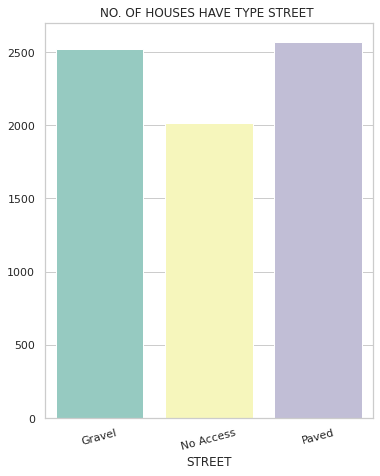

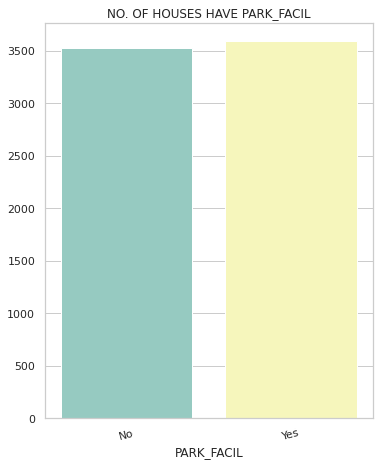

In [201]:
## a1 NUMBER OF HOUSE HAVE STREET
plt.figure(figsize=(20,16))
plt.subplot(231)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES HAVE TYPE STREET ')
sns.barplot(x=a1.index,y=a1.values,data=df1,palette="Set3")
## A2 NUMBER OF HOUSE HAVE PARK_FACIL
plt.figure(figsize=(20,16))
plt.subplot(231)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES HAVE PARK_FACIL')
sns.barplot(x=a2.index,y=a2.values,data=df1,color='pink',palette="Set3")
plt.show()

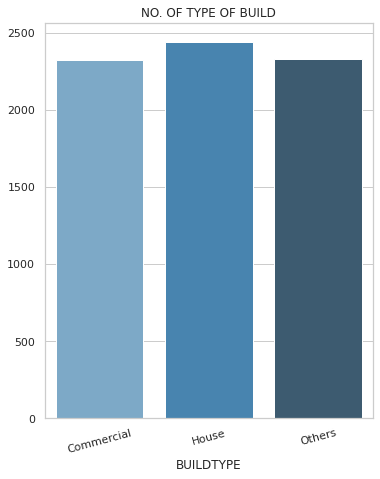

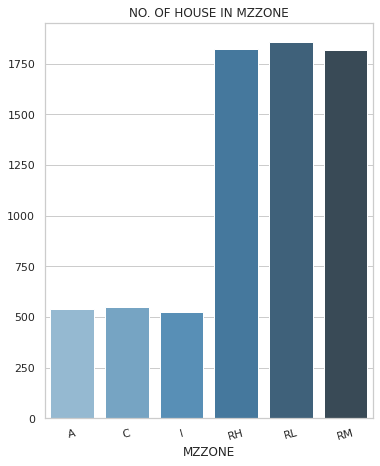

In [202]:
## A3 HAS NUMBER OF HOUSE ARE TYPE OF BUILD
plt.figure(figsize=(20,16))
plt.subplot(231)
plt.xticks(rotation=15)
plt.title('NO. OF TYPE OF BUILD')
sns.barplot(x=a3.index,y=a3.values,data=df1, palette="Blues_d")
# A4 HAS NUMBER OF HOUSE ARE MZZONE
plt.figure(figsize=(20,16))
plt.subplot(231)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSE IN MZZONE')
sns.barplot(x=a4.index,y=a4.values,data=df1, palette="Blues_d")

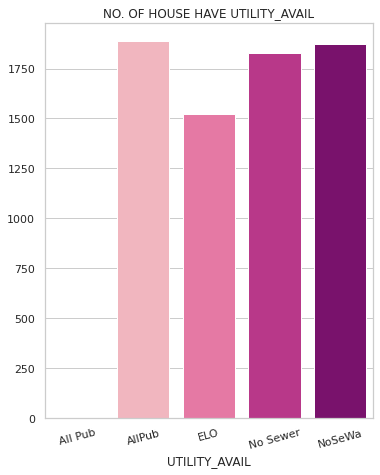

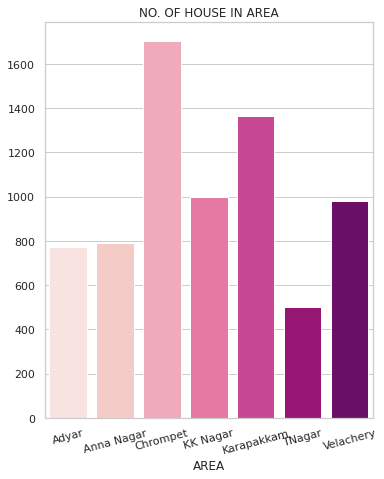

In [203]:
## A5 HAS NUMBER OF HOUSE HAVE UTILITY AVAILABIL
plt.figure(figsize=(20,16))
plt.subplot(231)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSE HAVE UTILITY_AVAIL')
sns.barplot(x=a5.index,y=a5.values,data=df1, palette="RdPu")
# A6 HAS NUMBER OF HOUSE ARE MZZONE
plt.figure(figsize=(20,16))
plt.subplot(231)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSE IN AREA')
sns.barplot(x=a6.index,y=a6.values,data=df1, palette="RdPu")

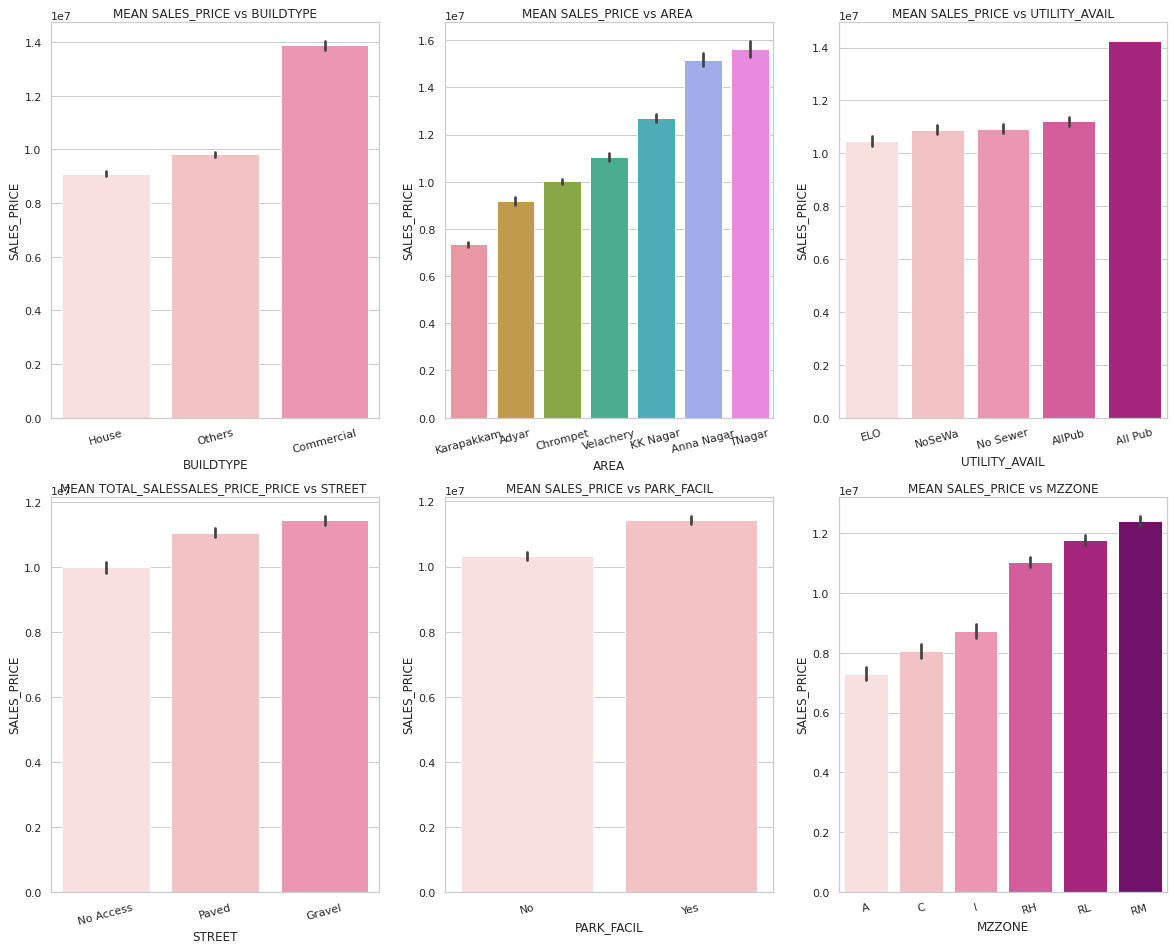

In [204]:
## FROM THIS VISUZISATION WE CAN ARANGE THE FOLLOWING FEATURE TO ENCONDING

sns.set_theme(style="whitegrid", palette="RdPu",)
plt.figure(figsize=(20,16))
plt.subplot(231)
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df1,order=df1.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE vs BUILDTYPE')
plt.subplot(232)
sns.barplot(x='AREA',y='SALES_PRICE',data=df1,order=df1.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE vs AREA ')
plt.subplot(233)
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df1,order=df1.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE vs UTILITY_AVAIL')
plt.subplot(234)
sns.barplot(x='STREET',y='SALES_PRICE',data=df1,order=df1.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.xticks(rotation=15)
plt.title('MEAN TOTAL_SALESSALES_PRICE_PRICE vs STREET ')
plt.subplot(235)
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=df1,order=df1.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE vs PARK_FACIL')
plt.subplot(236)
sns.barplot(x='MZZONE',y='SALES_PRICE',data=df1,order=df1.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE vs MZZONE')
plt.show()

REALTION BETWEEN TARGET VARIABLE

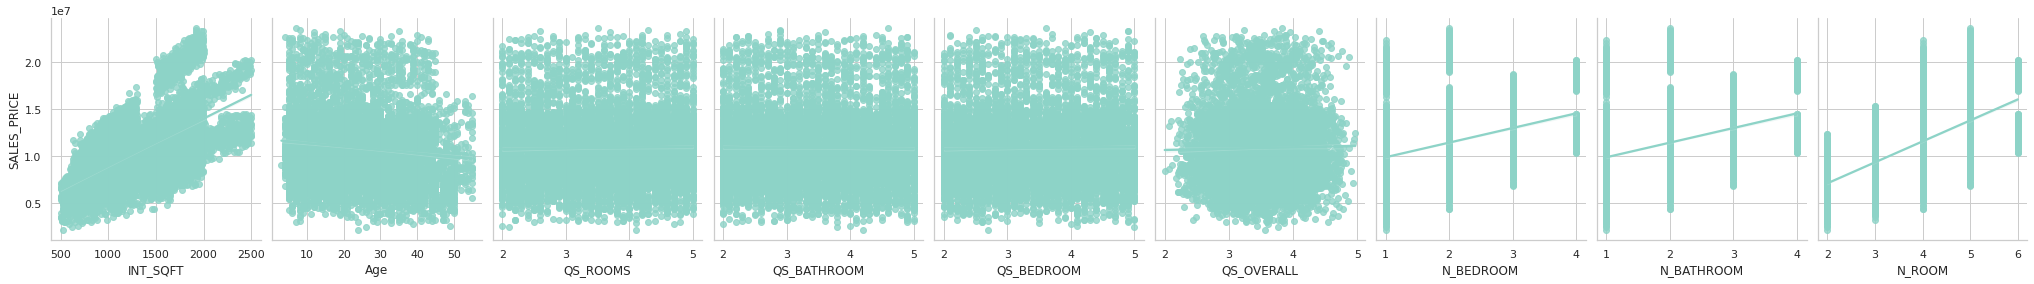

In [205]:
## THIS FEATURE ARE IN COINTINUOUS VARIBALE  FIRST CHECK RELATION
sns.set_theme(style="whitegrid", palette="Set3",)
sns.pairplot(df1,x_vars=["INT_SQFT", "Age","QS_ROOMS","QS_BATHROOM","QS_BEDROOM","QS_OVERALL","N_BEDROOM","N_BATHROOM","N_ROOM"], y_vars=["SALES_PRICE"],
             height=4,aspect=.8, kind="reg",)
plt.show()

ENCODING FOR CATEGORICAL FEATURES

In [206]:
df1.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE', 'Age'],
      dtype='object')

In [236]:
df1.drop(columns = ['PRT_ID'],inplace=True)


In [208]:
df1.AREA = df1.AREA.map({'Karapakkam':1,"Adyar":2,"Chrompet":3,"Velachery":4,"KK Nagar":5,"Anna Nagar":6,"TNagar":7})
df1.AREA.unique()

array([1, 6, 2, 4, 3, 5, 7])

In [209]:
df1.SALE_COND.unique()

array(['Abnormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [211]:
df1.SALE_COND = df1.SALE_COND.map({'Partial':1,"Family":2,"Abnormal":3,"Normal Sale":4,"AdjLand":5})
df1.SALE_COND.unique()

array([3, 2, 1, 5, 4])

In [213]:
df1.PARK_FACIL.unique()

array(['Yes', 'No'], dtype=object)

In [214]:
df1.PARK_FACIL =df1.PARK_FACIL.map({"No":0,"Yes":1})
df1.PARK_FACIL.unique()

array([1, 0])

In [224]:
df1.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'No Sewer'], dtype=object)

In [225]:
df1.UTILITY_AVAIL = df1.UTILITY_AVAIL.map({"ELO":1,"No Sewer":2,"AllPub":3})
df1.UTILITY_AVAIL.unique()

array([3, 1, 2])

In [227]:
df1.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [228]:
df1.STREET = df1.STREET.map({"No Access":1,"Paved":2,"Gravel":3})
df1.STREET.unique()

array([2, 3, 1])

In [230]:
df1.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [231]:
df1.MZZONE = df1.MZZONE.map({"A":1,"C":2,"I":3,"RH":4,"RL":5,'RM':6})
df1.MZZONE.unique()

array([1, 4, 5, 3, 2, 6])

In [233]:
df1.BUILDTYPE.unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [234]:
df1.BUILDTYPE = df1.BUILDTYPE.map({"House":0,"Others":1,"Commercial":2})
df1.BUILDTYPE.unique()

array([2, 1, 0])

In [237]:
df1.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,Age
0,1,1004,131,1.0,1.0,3,3,1,2,3,2,1,4.0,3.9,4.9,4.330,7600000,44
1,6,1986,26,2.0,2.0,5,3,0,2,3,3,4,4.9,4.2,2.5,3.765,21717770,11
2,2,909,70,1.0,1.0,3,3,1,2,1,3,5,4.1,3.8,2.2,3.090,13159200,20
3,4,1855,14,3.0,3.0,5,2,0,1,2,2,3,4.7,3.9,3.6,4.010,9630290,22
4,1,1226,84,1.0,1.0,3,3,1,1,3,3,2,3.0,2.5,4.1,3.290,7406250,30


SPLITTING DATA

In [239]:
X= np.array(df1.drop(['SALES_PRICE'],axis=1))
y= np.array(df1['SALES_PRICE'])

In [240]:
from sklearn.model_selection import train_test_split

In [241]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25,random_state=5)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((5331, 17), (1778, 17), (5331,), (1778,))

MACHINE LEARNING MODEL

In [246]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

1st MODEL LINEAR REGRESSION MODEL

In [242]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [243]:
lr.fit(X_train,Y_train)

LinearRegression()

In [244]:
yl_pred=lr.predict(X_test)

In [247]:
print(r2_score(Y_test,yl_pred))

0.8866118913692174


2nd MODEL IS RANDOM FOREST

In [248]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 100, max_depth = 5, max_features='sqrt')

# Train the model on training data
rf.fit(X_train, Y_train);

# Use the forest's predict method on the test data
yr_pred = rf.predict(X_test)

In [249]:
print("Random forest Regressor model Rsquared metric",r2_score(Y_test,yr_pred))

Random forest Regressor model Rsquared metric 0.8910317014816418


3rd MODEL IS XGBOOST

In [250]:
import xgboost as xg
# xg_model = XGBRegressor()
xg= xg.XGBRegressor(colsample_bytree=0.4,
                 gamma=2,                 
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=1000,                                                                    
                )

In [251]:
xg.fit(X_train,Y_train)

[16:53:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.4, gamma=2, learning_rate=0.01, max_depth=4,
             min_child_weight=1.5, n_estimators=1000)

In [252]:
yx_pred=xg.predict(X_test)

In [253]:
print("XGBoost model Rsquared metric:",r2_score(Y_test,yx_pred))

XGBoost model Rsquared metric: 0.9934844366485798


4th MODEL IS ENSEMBLE TECHNIQUE

In [255]:
model1 = LinearRegression()
model2 = RandomForestRegressor(random_state=1)
model3 = GradientBoostingRegressor(random_state=1)
model4 = DecisionTreeRegressor(random_state=1)

model = VotingRegressor(estimators=[('Linear_Regg', model1), ('Random_Forest', model2), ('Gradient_Boosting', model3),('Decision_Tree',model4)])
model.fit(X_train,Y_train)
ye_pred=model.predict(X_test)
print("Ensemble Technique Rsquared metric",r2_score(Y_test,ye_pred))

Ensemble Technique Rsquared metric 0.9848955661974675


R_SQUARED_SCORES

In [256]:
print("XGBoost model Rsquared metric:",r2_score(Y_test,yx_pred))
print("Ensemble Technique Rsquared metric:",r2_score(Y_test,ye_pred))
print("Random forest Regressor model Rsquared metric:",r2_score(Y_test,yr_pred))
print("Linear Regg model Rsquared metric:",r2_score(Y_test,yl_pred))

XGBoost model Rsquared metric: 0.9934844366485798
Ensemble Technique Rsquared metric: 0.9848955661974675
Random forest Regressor model Rsquared metric: 0.8910317014816418
Linear Regg model Rsquared metric: 0.8866118913692174


#BEST MODEL

My XGBoost model give me the high accuracy which is close to 1

Followed by Ensemble Technique, RandomForest Regressor and Linear Regression.

In [257]:
best_prediction = pd.DataFrame({
    'actual':Y_test,
    'predicted':yx_pred.flatten()
})

best_prediction.head()

,actual,predicted
0,9866820,9986014.0
1,14238410,14163314.0
2,13547020,13702656.0
3,14048900,13863036.0
4,7439700,7505155.0


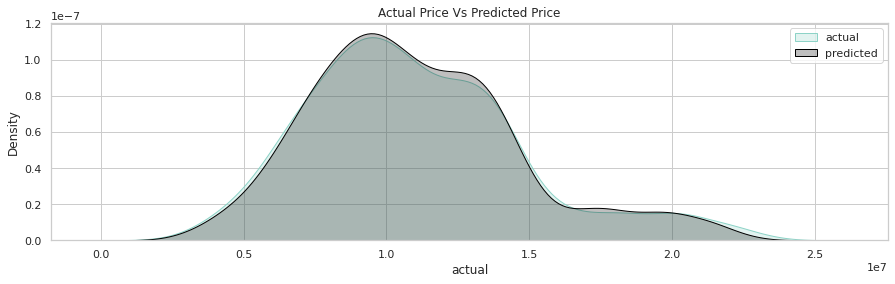

In [258]:
plt.figure(figsize=(15,4))
sns.kdeplot(data=best_prediction, x='actual', label='actual', shade=True)
sns.kdeplot(data=best_prediction, x='predicted', label='predicted', color="black", shade=True)
plt.title("Actual Price Vs Predicted Price")
plt.legend()
plt.show()